> For visualizing climbing mount likelihood :)

In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, Image
import plotly.graph_objs as go

## Example from Plotly

In [10]:
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

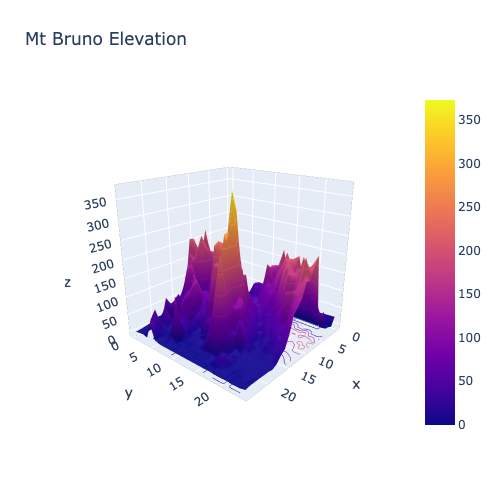

In [11]:
Image(filename='../images/surface-figure-1.png')

## Example of Climbing Mount Likelihood (NBD)

In [12]:
df = pd.read_csv('../data/barchart-1.csv').iloc[:, :2]

In [35]:
# Get values first
alpha_array = np.arange(0.01, 1.01, 0.01)
r_array = np.arange(0.01, 1.01, 0.01)

In [36]:
ll = []
for i in alpha_array:
    ll_i = []
    for j in r_array:
        some_ll = log_likelihood(i, j, 1, df['values'], df['actual'])
        ll_i.append(some_ll)
    ll.append(ll_i)

In [38]:
fig = go.Figure(
    go.Surface(
        contours = {
            "z": {"show": True, "start": -500, "end": -491, "size": 2}
        },
        x = alpha_array,
        y = r_array,
        z = ll)
)

fig.update_layout(
        scene = {
           "xaxis": {"title": "alpha", },
           "yaxis": {"title": "r", },
           "zaxis": {"title": "log-likelihood"}
        }
)

fig.show()

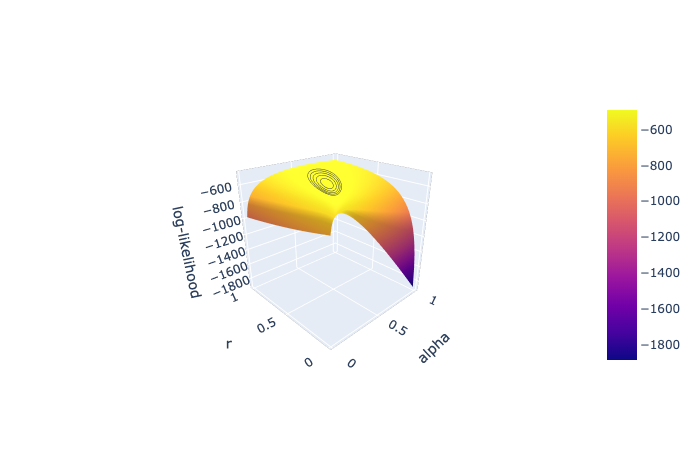

In [34]:
Image('../images/surface-figure-2.png')

> Looks kinda meh actually..